In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

proj_dir = "D:/Penn/proj/histone_assay/"

baseline = pd.read_csv(os.path.join(proj_dir, "./results/curve_results/skyline/baseline/figuresofmerit.csv"))
optimized = pd.read_csv(os.path.join(proj_dir, "./results/curve_results/skyline/optimized/figuresofmerit.csv"))

results = baseline[['peptide','LOD','LOQ']]
results.rename(columns={'LOD':'baselineLOD', 'LOQ':'baselineLOQ'}, inplace=True)
results = pd.merge(results, optimized[['peptide', 'LOD', 'LOQ']], on='peptide')
results.rename(columns={'LOD':'optimizedLOD', 'LOQ':'optimizedLOQ'}, inplace=True)
results.replace(np.inf, 6000, inplace=True)
results.replace(np.nan, 6000, inplace=True)
results.head()

C:\Users\linds\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,peptide,baselineLOD,baselineLOQ,optimizedLOD,optimizedLOQ
0,G[+56]K[+42]QGGK[+42]AR +1,6000.000000,6000.000000,6000.000000,6000.000000
1,G[+56]K[+42]QGGK[+42]AR +2,907.367439,948.707162,4562.901293,6000.000000
2,G[+56]K[+42]QGGK[+42]AR +3,6000.000000,6000.000000,6000.000000,6000.000000
3,G[+56]K[+56]QGGK[+42]AR +1,2138.233023,2745.274503,251.267696,2265.881401
4,G[+56]K[+56]QGGK[+42]AR +2,694.907688,738.393469,32.613024,82.788650


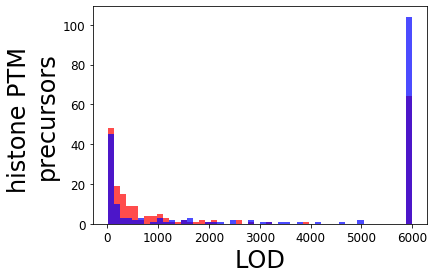

In [56]:
# histogram
plt.hist(results['baselineLOD'], bins=50, color="red", alpha=0.7)
plt.hist(results['optimizedLOD'], bins=50, color="blue", alpha=0.7)
plt.xlabel('LOD')
plt.ylabel('histone PTM \nprecursors')
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\linds\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

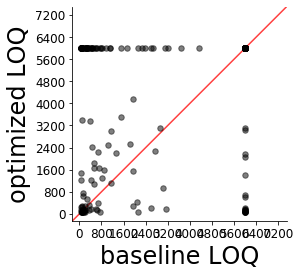

In [53]:
## plots two vectors against each other
def plot_correlation(x, y, xlabel, ylabel, ptalpha=0.5):
    
    # define three sizes for everything in the figure (axes, etc)
    SMALL_SIZE = 12
    MEDIUM_SIZE = 24
    BIGGER_SIZE = 26

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    # make a scatterplot of the data x vs y
    fig, ax = plt.subplots()
    ax.scatter(x, y, color='black', alpha=ptalpha, s=30)

    # use the same axis scale for all plots for uniformity
    lims = [-250, 7500]

    # add a red-colored line of equality, y=x
    ax.plot(lims, lims, 'k-', alpha=0.75, color='red', zorder=0)
    
    # now plot both axes against each other
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    # force axis ticks to be integers so the plot is prettier
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # hide the right and top spines for prettier plot
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # add labels for the two axes based on function inputs
    fig.suptitle('', fontsize=16)  # no title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # adjust the borders to cut off excess whitespace and make room for xaxis label
    plt.tight_layout()

    return plt

plot_correlation(results['baselineLOQ'], results['optimizedLOQ'], 'baseline LOQ', 'optimized LOQ', ptalpha=0.5)
